## 로지스틱 회귀

### 시그모이드 함수
- 데이터를 0~1사이 배치시키는 확률을 위한 함수

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

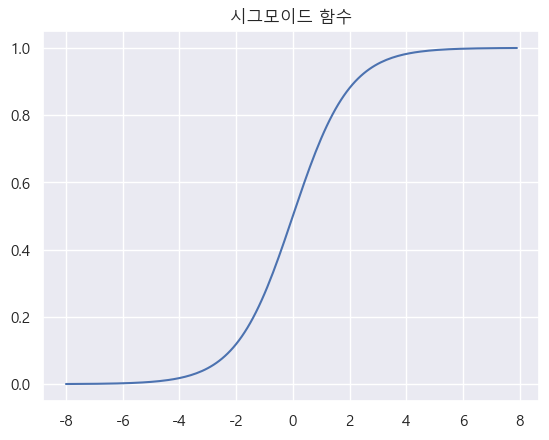

In [60]:
# 시그모이드 함수 그리기
z = np.arange(-8, 8, 0.1)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title('시그모이드 함수')
plt.show()

- 클래스 - 분류되는 아이템
    - 양성 클래스 - 0.5보다 크면
    - 틈성 클래스 - 0.5보다 작으면

### 로지스틱 회귀 이진 분류

- 기준데이터 : https://bit.ly/fish_csv_data
- Pandas로 데이터 로드
- Numpy는 문자열은 처리안됨

In [61]:
import pandas as pd

In [62]:
# 데이터 로드
fish = pd.read_csv('./fish.csv', encoding='utf-8')
fish

Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]

- Species(종), Weight(무게), Length(길이), Diagonal(대각선길이), Height(높이), Width(두께)
- 어종 분류
    - Bream - 도미
    - Roach - 유럽잉어
    - Whitefish - 송어
    - Parkki - 팍키
    - Perch - 농어
    - Pike - 강꼬치고기
    - Smelt - 빙어

In [63]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

- 특성데이터, 타겟데이터 분리

In [64]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [65]:
fish_input[:4]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555]])

In [66]:
# 물고기종 타겟
fish_target = fish['Species'].to_numpy()

In [67]:
fish_target[:4]

array(['Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [68]:
# 훈련세트와 테스트세트 나누기
from sklearn.model_selection import train_test_split

In [69]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [70]:
train_input.shape

(119, 5)

In [71]:
test_input.shape

(40, 5)

In [72]:
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

- 특성이 전부 단위가 달라서 무게가 가장 영향이 크게 됨
- 모든 특성 데이터를 -2~2 사이로 재배치
- 직접 평균으로 빼고, 표준편차로 나눌 것이 아니면 StandardScaler를 사용할 것

In [73]:
# 표준정규화(Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
scaler.fit(train_input)

StandardScaler()

In [75]:
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

In [76]:
train_scaled[3]

array([-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471])

### 이진분류 수행
- Bream(도미)와 Smelt(빙어)만 분리

In [77]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

- bream_smelt_indexes 에서 True 인 것만 추출

In [78]:
train_scaled_bream_smelt = train_scaled[bream_smelt_indexes]

In [79]:
train_target_bream_smelt = train_target[bream_smelt_indexes]

In [80]:
train_target_bream_smelt.shape

(33,)

### 이진분류 수행

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression()
lr

LogisticRegression()

In [83]:
lr.fit(train_scaled_bream_smelt, train_target_bream_smelt)

LogisticRegression()

In [84]:
lr.score(train_scaled_bream_smelt, train_target_bream_smelt)

1.0

In [85]:
lr.predict(train_scaled_bream_smelt[5:11])

array(['Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [87]:
# 원본 데이터에서 확인
train_input[bream_smelt_indexes][5:11]

array([[  8.7   ,  11.3   ,  12.6   ,   1.9782,   1.2852],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ],
       [925.    ,  39.5   ,  45.3   ,  18.7542,   6.7497],
       [475.    ,  31.    ,  36.2   ,  14.2628,   5.1042],
       [242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [850.    ,  36.    ,  41.6   ,  16.8896,   6.1984]])

In [88]:
train_target_bream_smelt[5:11]

array(['Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [89]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [90]:
# 계수(기울기/가중치), 절편 구하기
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


- 이진분류 로지스틱 회귀 방정식
    - z = -0.4051732 x 무게 - 0.57582787 x 대각선길이 - 1.01329614 x 높이 - 0.73123131 x 두께 - 2.16172774

In [91]:
# z값 -> lr.decision_function() 사용
decisions = lr.decision_function(train_scaled_bream_smelt[:5])
decisions

array([-6.02991358,  3.57043428, -5.26630496, -4.24382314, -6.06135688])

- 시그모이드 함수에 통과시켜 확률 구함
- Scipy - Numpy와 유사한 과학 라이브러리
    - expit() - np.exp(-z)보다 계산이 편리

In [92]:
from scipy.special import expit

In [93]:
expit(decisions)

array([0.00239993, 0.97262675, 0.00513614, 0.01414953, 0.00232581])

- 0.5 초과의 양성클래스 - smeld(빙어)
- 0.5 이하의 음성클래스 - bream(도미)

#### 결론
- 머신러닝에서 이진분류시 로지스틱 회귀가 가장 효과적

### 로지스틱 회귀 다중 분류

- 데이터가 모두 들어있는 train_scaled, train_target을 사용
- 규제 사용 : 과대적합 또는 과소적합을 막기 위해서 추가하는 `하이퍼파라미터`
- 반복횟수 : 사용자가 정하는 `하이퍼파라미터`

In [95]:
# 규제 C=20 기본값 1.
# 반복횟수 max_iter=1000 번
lr2 = LogisticRegression(C=20, max_iter=1000)
lr2

LogisticRegression(C=20, max_iter=1000)

In [96]:
# 로지스틱 회귀 훈련
lr2.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [97]:
lr2.score(train_scaled, train_target)

0.9327731092436975

In [98]:
# 테스트 데이터로 예측
lr2.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [100]:
# 실제 데이터
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

- 예측확률표 출력

In [101]:
lr2.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [102]:
proba = lr2.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)
# Bream, Parkki, Perch, Pike, Roach, Smelt, Whitefish
# 도미, 팍키, 농어, 강꼬치고기, 유럽잉어, 빙어, 숭어

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

### 소프트맥스 함수 사용

In [103]:
decision = lr2.decision_function(test_scaled[:5])
decision

array([[ -6.50722812,   1.03902667,   5.16819138,  -2.75730347,
          3.336552  ,   0.34625857,  -0.62549703],
       [-10.87900745,   1.94410611,   4.77600606,  -2.42306183,
          2.98748716,   7.84171374,  -4.24724379],
       [ -4.33809956,  -6.23690281,   3.16746647,   6.4809139 ,
          2.36412675,   2.43431897,  -3.87182373],
       [ -0.69143992,   0.44628534,   2.64291146,  -1.21457286,
          3.2612452 ,  -5.70143406,   1.25700485],
       [ -6.4013861 ,  -1.99137623,   5.81526371,  -0.13464401,
          3.49905133,  -0.08753486,  -0.69937385]])

In [104]:
from scipy.special import softmax

In [105]:
proba2 = softmax(decision, axis=1)
np.round(proba2, decimals=3)
# lr2.predict_proba()로 처리한 결과 == scipy.softmax()로 계산한 결과

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])